In [1]:
from tensorflow.keras import Model, layers

input = layers.Input(shape=(28,28,3))

x = layers.Conv2D(128, 3, padding='same', activation='relu')(input)

conv = layers.Conv2D(64, 3, padding='same', activation='relu')(x)
conv = layers.Conv2D(128, 3, padding='same')(conv)

y = layers.add([conv, x])
y = layers.Activation('relu')(y)

model = Model(inputs=input, outputs=y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 128)  3584        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 28, 28, 64)   73792       ['conv2d[0][0]']                 
                                                                                                  
 conv2d_2 (Conv2D)              (None, 28, 28, 128)  73856       ['conv2d_1[0][0]']               
                                                                                              

In [2]:
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation
from tensorflow.keras.layers import AveragePooling2D, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.datasets import cifar10

NUM_CLASSES = 10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('x_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')

input_shape = X_train.shape[1:]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

inputs = Input(shape=input_shape)

conv = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')
x = conv(inputs)
x = BatchNormalization()(x)

conv = Conv2D(filters=32, kernel_size=3, padding='same', activation='relu',
              kernel_regularizer=l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              kernel_regularizer=l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              activation='relu',
              kernel_regularizer=l2(1e-4))
y = conv(x)
y = BatchNormalization()(y)

conv = Conv2D(filters=32, kernel_size=3, padding='same',
              kernel_regularizer=l2(1e-4))
y = conv(y)
y = BatchNormalization()(y)

x = keras.layers.add([x, y])
x = Activation('relu')(x)

x = AveragePooling2D(pool_size=8)(x)
y = Flatten()(x)

y = Dense(512, activation='relu')(y)
outputs = Dense(NUM_CLASSES, activation='softmax')(y)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

x_train shape: (50000, 32, 32, 3)
50000 train samples
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_3 (Conv2D)              (None, 32, 32, 32)   896         ['input_2[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 32)  128         ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                                  
 conv2d_4 (Conv2D)              (None,

In [3]:
import os

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

EPOCHS = 40
BATCH_SIZE = 200

save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_model-{epoch:03d}-{val_accuracy:.4f}.keras'

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

filepath = os.path.join(save_dir, model_name)

checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True)

def lr_schedule(epoch):
    lr = 1e-3
    if epoch > 90:
        lr *= 0.5e-3
    elif epoch > 80:
        lr *= 1e-3
    elif epoch > 60:
        lr *= 1e-2
    elif epoch > 40:
        lr *= 1e-1
    print('Learning rate: ', lr)
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

my_callbacks = [checkpoint, lr_scheduler]

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE,
                    callbacks=my_callbacks)

Learning rate:  0.001
Epoch 1/40
249/250 [============================>.] - ETA: 0s - loss: 1.3778 - accuracy: 0.5103
Epoch 1: val_accuracy improved from -inf to 0.14490, saving model to C:\Users\user\ai-torch\saved_models\cifar10_model-001-0.1449.keras
250/250 [==============================] - 7s 16ms/step - loss: 1.3772 - accuracy: 0.5106 - val_loss: 3.3387 - val_accuracy: 0.1449 - lr: 0.0010
Learning rate:  0.001
Epoch 2/40
249/250 [============================>.] - ETA: 0s - loss: 0.9900 - accuracy: 0.6525
Epoch 2: val_accuracy improved from 0.14490 to 0.50700, saving model to C:\Users\user\ai-torch\saved_models\cifar10_model-002-0.5070.keras
250/250 [==============================] - 4s 15ms/step - loss: 0.9892 - accuracy: 0.6528 - val_loss: 1.4193 - val_accuracy: 0.5070 - lr: 0.0010
Learning rate:  0.001
Epoch 3/40
249/250 [============================>.] - ETA: 0s - loss: 0.8400 - accuracy: 0.7095
Epoch 3: val_accuracy improved from 0.50700 to 0.66410, saving model to C:\Users\

249/250 [============================>.] - ETA: 0s - loss: 0.1241 - accuracy: 0.9658
Epoch 24: val_accuracy did not improve from 0.79720
250/250 [==============================] - 4s 15ms/step - loss: 0.1240 - accuracy: 0.9658 - val_loss: 0.8748 - val_accuracy: 0.7869 - lr: 0.0010
Learning rate:  0.001
Epoch 25/40
249/250 [============================>.] - ETA: 0s - loss: 0.1145 - accuracy: 0.9696
Epoch 25: val_accuracy did not improve from 0.79720
250/250 [==============================] - 4s 15ms/step - loss: 0.1145 - accuracy: 0.9695 - val_loss: 0.9970 - val_accuracy: 0.7750 - lr: 0.0010
Learning rate:  0.001
Epoch 26/40
249/250 [============================>.] - ETA: 0s - loss: 0.1117 - accuracy: 0.9705
Epoch 26: val_accuracy did not improve from 0.79720
250/250 [==============================] - 4s 15ms/step - loss: 0.1116 - accuracy: 0.9705 - val_loss: 0.9310 - val_accuracy: 0.7903 - lr: 0.0010
Learning rate:  0.001
Epoch 27/40
249/250 [============================>.] - ETA: 0s -

In [4]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

313/313 [==============================] - 1s 2ms/step - loss: 1.2475 - accuracy: 0.7731
Test loss: 1.2475316524505615
Test accuracy: 0.7731000185012817


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


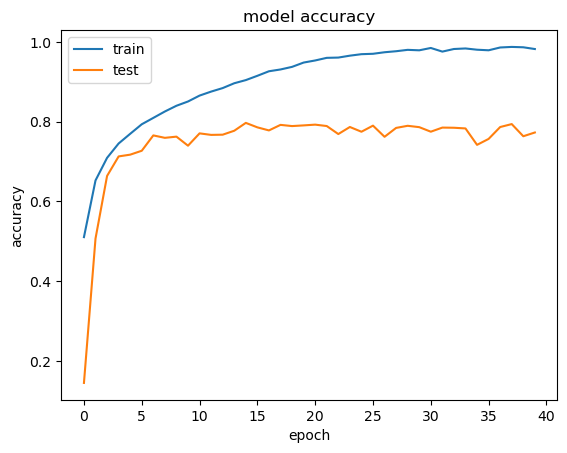

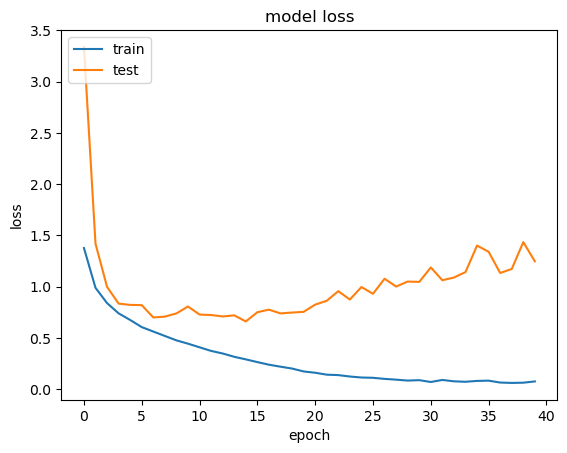

In [5]:
import matplotlib.pyplot as plt

print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()